# Accredian_assignment

## Data Import , explore , clean

In [2]:
import pandas as pd ,numpy as np , seaborn as sns ,\
      matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:/Users/RohanRVC/Downloads/Fraud.csv")
 
df.shape

(6362620, 11)

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Checking for any missing values

In [5]:
df.isnull().values.any()
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Getting information of data


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Lets see transactions details

In [7]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


* The data exhibits a significant imbalance with the vast majority of transactions being legitimate and a small fraction being fraudulent.
* In such cases, decision trees and random forests are often recommended due to their effectiveness in handling imbalanced datasets.


In [8]:
X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


### For this there is no information regarding the attributes of oldbalanceDest and newbalanceDest.



## Visualization

C:\Users\RohanRVC\AppData\Local\Temp\ipykernel_5788\345138099.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


[]

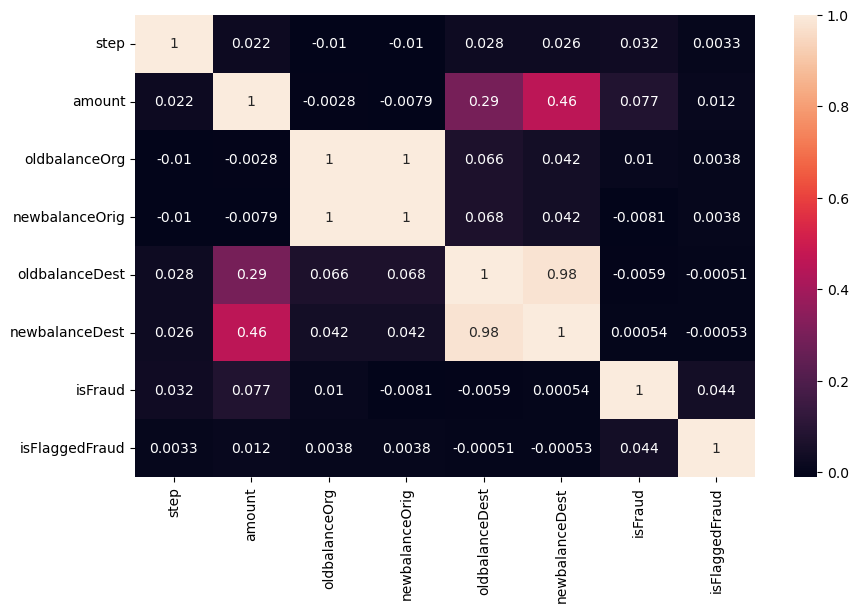

In [9]:
corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.plot()

### TOTAL NUMBER OF LEGIT AND FRAUD TRANSACTIONS¶


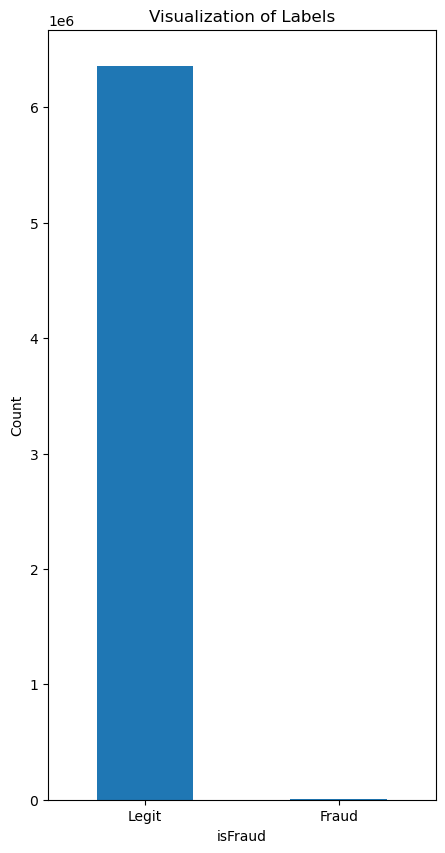

In [10]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()


In [11]:
new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Label encoding in progress

In [12]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


* The dataset contains three attributes that are of Object datatype.

* For the purpose of analyzing multicollinearity, these attributes will need to be label encoded to convert them into a numerical format.








In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [14]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


## Moving to Multi-Colinearity

In [15]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


* The attributes oldbalanceOrg and newbalanceOrig exhibit a high level of correlation, as do oldbalanceDest and newbalanceDest. 

* Additionally, there is a connection between nameOrig and nameDest.

* It is advisable to merge these pairs of correlated attributes into single ones and remove the individual columns to streamline the dataset.

<Axes: >

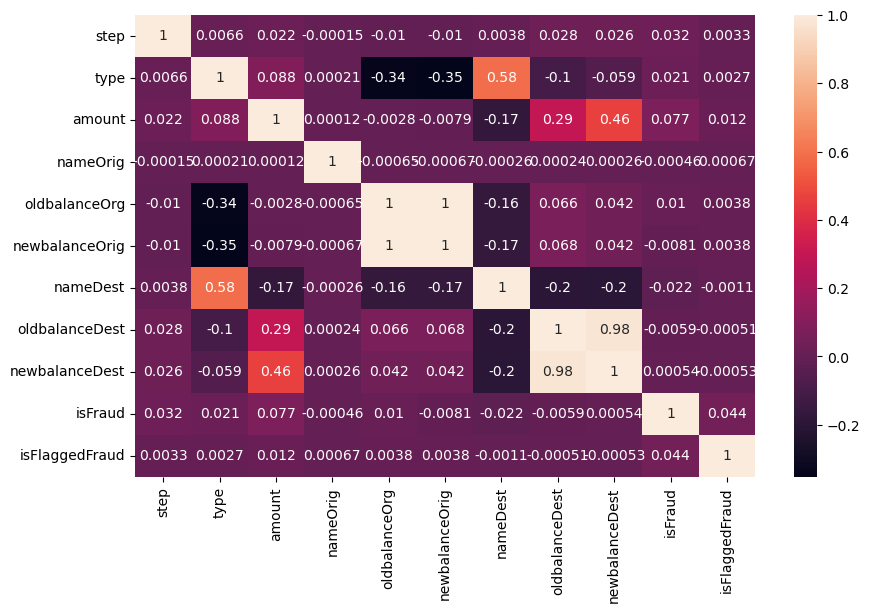

In [16]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

## How did you select variables to be included in the model?
* Based on the Variance Inflation Factor (VIF) and the correlation heatmap, we should identify any two attributes that are highly correlated.

*  After identifying them, we would retain the attribute that has a stronger correlation to the 'isFraud' attribute and discard the other.








## Building the Model

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

* **Scaling the Transaction** Amount adjusting the values of the transaction amount so they are on a similar scale to other numeric fields in the dataset.

* This process is essential because it ensures that the amount does not disproportionately influence the model due to its range of values.

* By scaling, we make sure that the model treats all features equally.

* This can be particularly important in distance-based algorithms where the scale of the data can affect the outcome of the analysis.




## I avoided normalizing the entire dataset to prevent a potential decline in the model's accuracy.








In [18]:
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

## Train-Test Split
* It is a practice of dividing the dataset into two parts: one to train the machine learning model and the other to test its performance.

* This is crucial to evaluate how well the model will perform on unseen data, ensuring it can generalize beyond the examples it was trained on. Typically, a larger portion of the data is used for training (such as 70-80%) and the remainder for testing.

* This approach helps in preventing overfitting, where a model performs well on training data but poorly on new data.

In [19]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 10)
Shape of X_test:  (1908786, 10)


## Model Training
* It involves teaching the machine learning algorithm using the training data to make predictions or decisions without being explicitly programmed.

* During this phase, the model learns patterns from the input features and corresponding outcomes, improving its accuracy with iterations.

* Once the training is complete, the model's performance is typically evaluated using the test data to see how well it can apply its learned patterns to new, unseen data.




In [20]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [21]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

## Evaluation

* It is the stage where we assess the performance of the machine learning model after it has been trained.

* This step is crucial as it gives us insights into the model's predictive accuracy and helps us understand its strengths and weaknesses.

* Various metrics, such as accuracy, precision, recall, and the F1 score, are used to measure how well the model can predict the outcome on new data that it hasn't seen before.

* This evaluation can guide further improvements to the model before it's deployed for actual use.

In [22]:
print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.96715189654576
Random Forest Score:  99.9689855227354


* For each model (DT and RF), the code calculates these values, providing a clear insight into how each model performs in terms of correctly or incorrectly classifying the data.

* This comparison is crucial for understanding the effectiveness of each model in distinguishing between different classes, especially in imbalanced datasets like fraud detection.

In [23]:
# For DT
print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("##########################################################")

# For RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 2101
False Positives: 293
True Negatives: 1906058
False Negatives: 334
##########################################################
TP,FP,TN,FN - Random Forest
True Positives: 1880
False Positives: 37
True Negatives: 1906314
False Negatives: 555


* The comparison between the Decision Tree and Random Forest models shows similar True Positive rates, meaning both models are equally effective at correctly identifying positive cases. 

* However, the Decision Tree has significantly more False Positives than the Random Forest, indicating that Random Forest is more accurate in this aspect.
* Additionally, Random Forest outperforms Decision Tree in True Negatives, showing better identification of negative cases. The False Negative rates are roughly the same for both models. 

### Overall, these points suggest that the Random Forest model has a better performance in this scenario.








In [24]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("#########################################################")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[1906058     293]
 [    334    2101]]
#########################################################
Confusion Matrix - Random Forest
[[1906314      37]
 [    555    1880]]


In [25]:
classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("################################################################")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.88      0.86      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.94      0.93      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786

################################################################
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.77      0.86      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



### Given its impressive precision and consequently strong F1-Score, the Random Forest model emerges as the more effective option, aligning with expectations for this type of analysis.








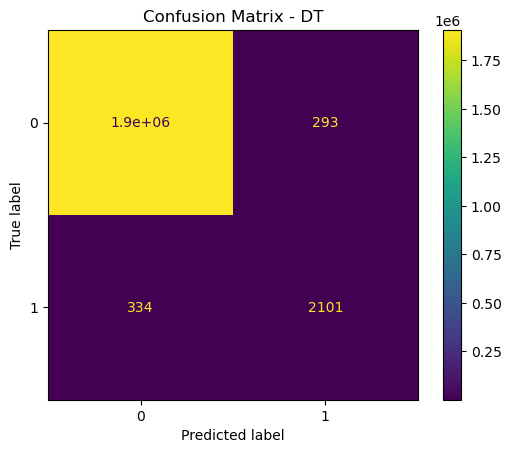

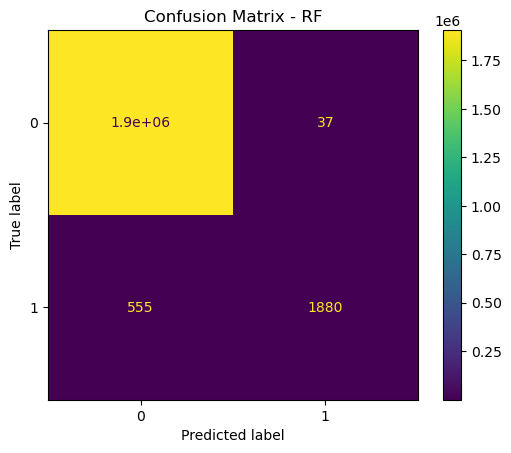

In [26]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

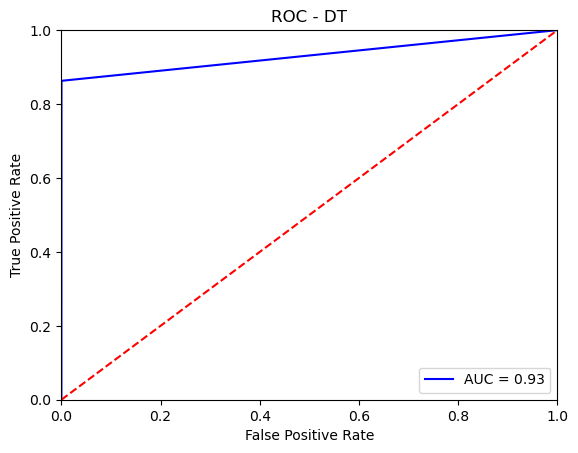

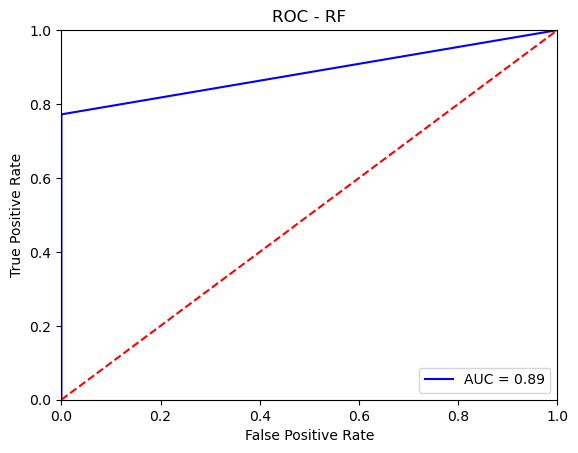

In [27]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)


plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### The Area Under the Curve (AUC) for both the Decision Tree and Random Forest models is identical, indicating that both models are equally proficient in their predictive abilities.








# Conclusion

In the realm of fraud detection models, precision is of paramount importance. This is because it's more crucial to accurately identify fraudulent transactions than it is to correctly predict normal ones. Misidentifying normal transactions as fraudulent can result in innocent parties being wrongly accused, while failing to catch actual fraud leaves the guilty unexposed. This underscores why Random Forest and Decision Trees are often preferred over other algorithms.

The decision to employ these models is further justified by the typically unbalanced nature of datasets in fraud detection (e.g., Legit to Fraud ratio of 99.87:0.13). Random Forest, with its multiple decision trees, offers a more nuanced understanding of such data. Although it's more time-consuming, it's effective because Decision Trees process information in a binary, straightforward manner.

While models like XGBoost, Bagging, ANN, and Logistic Regression might offer high accuracy, they often fall short in delivering satisfactory precision and recall values.

What are the key factors that predict fraudulent customer?

The security of the source of the request.
The legitimacy of the organization requesting funds.
The transaction history of the vendors involved.

What kind of prevention should be adopted while company update its infrastructure?

Utilize only smart, verified applications.
Navigate through secure websites.
Employ secure internet connections, such as VPNs.
Regularly update security on mobile devices and laptops.
Avoid responding to unsolicited calls, SMS, and emails.
In cases of suspected security breaches or fraud, contact the bank immediately.

Assuming these actions have been implemented, how would you determine if they work?

Banks should issue regular electronic statements.
Customers must vigilantly monitor their account activities.
Maintaining a log of all payments is advisable for tracking and verification purposes.



